In [40]:
import seaborn as sns
import pandas as pd
import os
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import numpy as np
import yfinance as yf
#import pypfopt

In [41]:
# Tickers of individual Asset Classes
tickers = ['SPY', 'IWM', 'VWO', 'BIZD', 'USRT', 'GLD', 'BLOK', 'VGLT', 'STIP', 'UUP', 'DBO', 'SHY']

In [42]:
# Assign initial weights to individual asset classes
weights = [.2,.1,.1,.1,.1,.1,.1,.05,.05,.05,.05,.0]

In [43]:
# Pull data from Yahoo Finance
port_df = pd.DataFrame()
port_df = yf.download(tickers, start="2010-01-01", end="2020-06-30")

[*********************100%***********************]  12 of 12 completed


In [44]:
# Daily adjusted close prices of individual asset classes
adj_close = pd.DataFrame()
adj_close = port_df["Adj Close"]
adj_close.head(-1)

,BIZD,BLOK,DBO,GLD,IWM,SHY,SPY,STIP,USRT,UUP,VGLT,VWO
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,27.198418,109.800003,55.099979,75.503258,91.841896,NaN,18.340460,22.210140,42.336452,32.526619
2010-01-05,NaN,NaN,27.450165,109.699997,54.910511,75.594154,92.084984,NaN,18.447060,22.200451,42.690735,32.634018
2010-01-06,NaN,NaN,27.789057,111.510002,54.858829,75.603294,92.149803,NaN,18.367109,22.142307,42.358593,32.833473
2010-01-07,NaN,NaN,27.595404,110.820000,55.263611,75.585037,92.538841,NaN,18.580292,22.287663,42.255268,32.549610
2010-01-08,NaN,NaN,27.730961,111.370003,55.565041,75.657776,92.846756,NaN,18.433731,22.132618,42.181446,32.749092
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-22,11.803732,20.455999,7.190000,165.089996,142.399994,86.479050,310.619995,102.349998,43.880001,26.240000,99.015373,40.070000
2020-06-23,11.735950,20.559999,7.130000,166.479996,143.000000,86.499031,312.049988,102.419998,43.630001,26.150000,98.456184,40.470001
2020-06-24,11.435774,20.080000,6.820000,165.899994,138.360001,86.509033,304.089996,102.269997,42.500000,26.270000,99.444740,39.860001


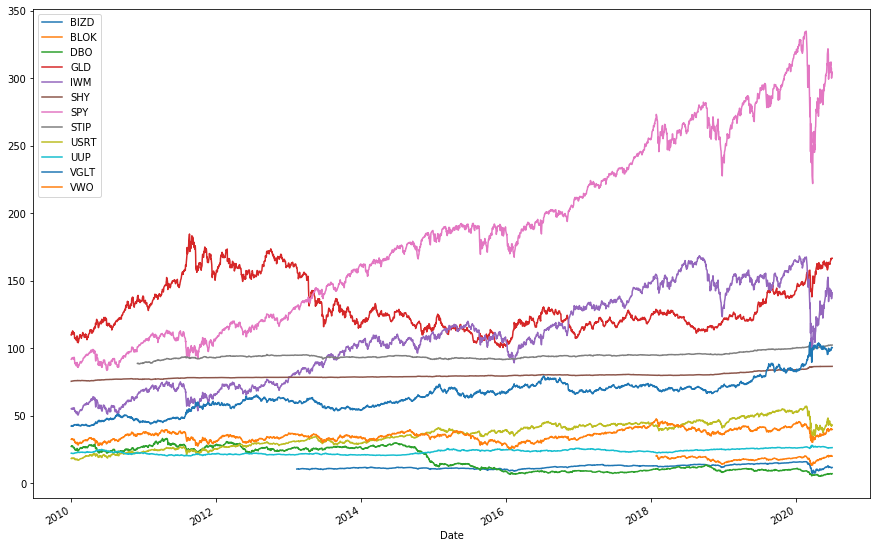

In [45]:
# Plot of indiviudal asset class pricess since 2010
adj_close[adj_close.index >= "2010-01-01"].plot(figsize=(15,10));

In [46]:
# Daily Returns of individual asset classes
dly_rtn = adj_close.pct_change()
dly_rtn.head(-1)

,BIZD,BLOK,DBO,GLD,IWM,SHY,SPY,STIP,USRT,UUP,VGLT,VWO
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,0.009256,-0.000911,-0.003439,0.001204,0.002647,NaN,0.005812,-0.000436,0.008368,0.003302
2010-01-06,NaN,NaN,0.012346,0.016500,-0.000941,0.000121,0.000704,NaN,-0.004334,-0.002619,-0.007780,0.006112
2010-01-07,NaN,NaN,-0.006969,-0.006188,0.007379,-0.000241,0.004222,NaN,0.011607,0.006565,-0.002439,-0.008646
2010-01-08,NaN,NaN,0.004912,0.004963,0.005454,0.000962,0.003327,NaN,-0.007888,-0.006957,-0.001747,0.006129
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-22,-0.009748,0.019741,0.024217,0.006462,0.010001,-0.000231,0.006415,0.000489,0.000684,-0.005307,-0.000101,0.010848
2020-06-23,-0.005742,0.005084,-0.008345,0.008420,0.004214,0.000231,0.004604,0.000684,-0.005697,-0.003430,-0.005647,0.009983
2020-06-24,-0.025578,-0.023346,-0.043478,-0.003484,-0.032448,0.000116,-0.025509,-0.001465,-0.025900,0.004589,0.010041,-0.015073


In [47]:
# Correlation matrix of asset classes
correlation = dly_rtn.corr()
correlation

,BIZD,BLOK,DBO,GLD,IWM,SHY,SPY,STIP,USRT,UUP,VGLT,VWO
BIZD,1.000000,0.553808,0.339467,0.022708,0.650166,-0.113724,0.598213,0.242697,0.590519,-0.028121,-0.174918,0.475802
BLOK,0.553808,1.000000,0.432574,0.097564,0.832772,-0.367803,0.886077,0.224271,0.653765,0.019369,-0.374399,0.845581
DBO,0.339467,0.432574,1.000000,0.128378,0.439487,-0.198864,0.453901,0.257786,0.305276,-0.178602,-0.298710,0.475903
GLD,0.022708,0.097564,0.128378,1.000000,0.019635,0.280000,0.008567,0.307414,0.071994,-0.356355,0.225335,0.128052
IWM,0.650166,0.832772,0.439487,0.019635,1.000000,-0.300033,0.912745,0.116532,0.741391,-0.136779,-0.450406,0.769798
SHY,-0.113724,-0.367803,-0.198864,0.280000,-0.300033,1.000000,-0.329497,0.480640,-0.105673,-0.172730,0.599976,-0.219730
SPY,0.598213,0.886077,0.453901,0.008567,0.912745,-0.329497,1.000000,0.097405,0.752089,-0.130788,-0.479527,0.827531
STIP,0.242697,0.224271,0.257786,0.307414,0.116532,0.480640,0.097405,1.000000,0.244439,-0.150283,0.332455,0.179341
USRT,0.590519,0.653765,0.305276,0.071994,0.741391,-0.105673,0.752089,0.244439,1.000000,-0.146540,-0.233154,0.636801
UUP,-0.028121,0.019369,-0.178602,-0.356355,-0.136779,-0.172730,-0.130788,-0.150283,-0.146540,1.000000,-0.031940,-0.264835


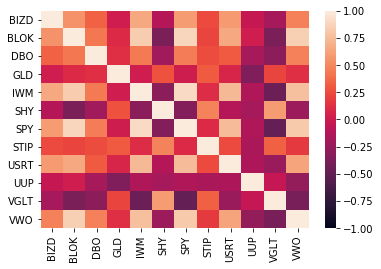

In [48]:
# Correlation matrix - visual
sns.heatmap(correlation,vmin=-1,vmax=1);

In [49]:
# Correlation coefficients - summed values
correlation.sum().sort_values(axis=0,ascending=True)

UUP    -0.577605
VGLT   -0.273269
SHY     0.552561
GLD     1.933292
DBO     3.156597
STIP    3.332698
BIZD    4.156616
VWO     4.466263
USRT    4.510906
IWM     4.595308
SPY     4.596716
BLOK    4.803579
dtype: float64

In [50]:
# Daily portfolio returns given defined weights
port_dly_rtn = dly_rtn.dot(weights)
port_dly_rtn.head(-1)

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2020-06-22    0.004499
2020-06-23   -0.000432
2020-06-24   -0.018567
2020-06-25    0.010339
2020-06-26   -0.011076
Length: 2639, dtype: float64

In [51]:
# Cumulative portfolio returns
cum_ret = (1 + port_dly_rtn).cumprod()
cum_ret.head(-1)

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2020-06-22    1.059464
2020-06-23    1.059006
2020-06-24    1.039343
2020-06-25    1.050088
2020-06-26    1.038457
Length: 2639, dtype: float64

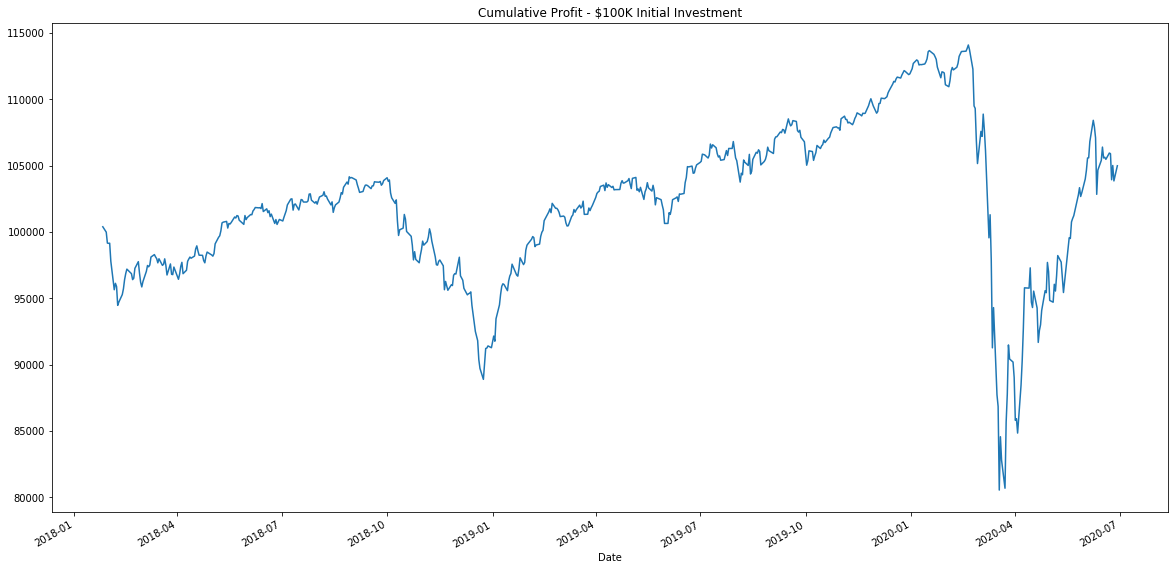

In [52]:
# Theoretical returns of the portfolio given an initial investment of $100K
ini_inv = 100000
cum_pft = ini_inv * cum_ret
cum_pft.plot(kind='line',figsize=(20,10),title='Cumulative Profit - $100K Initial Investment');